# K-Means Clustering

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Customers.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [4]:
dataset.shape

(2000, 8)

In [5]:
dataset.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [6]:
dataset.shape

(2000, 8)

In [7]:
X = dataset.iloc[:,[2,3,4]].values

In [8]:
print(X)

[[    19  15000     39]
 [    21  35000     81]
 [    20  86000      6]
 ...
 [    87  90961     14]
 [    77 182109      4]
 [    90 110610     52]]


### Using the elbow method to find the optimal number of clusters

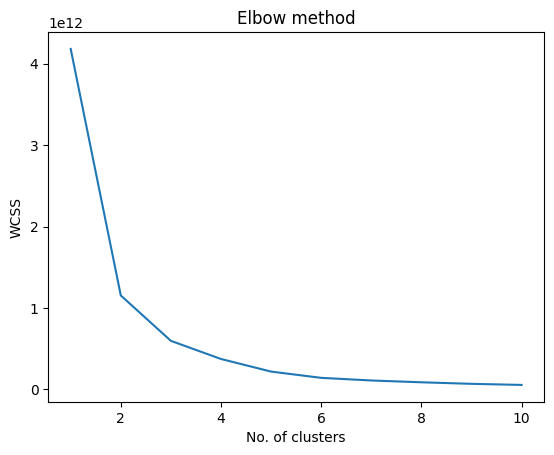

In [9]:
 from sklearn.cluster import KMeans
 wcss = []
 for i in range(1,11):
   kmeans = KMeans(n_clusters= i, init='k-means++',random_state= 42)
   kmeans.fit(X)
   wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("Elbow method")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.show()


## Training the K-Means model on the dataset

In [10]:
kmeans = KMeans(n_clusters= 5, init='k-means++',random_state= 42)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

## Statistics from the initialization run with the lowest SSE are available as attributes of kmeans after calling .fit()

In [11]:
# The lowest SSE value
kmeans.inertia_

217655990547.03223

In [12]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[4.97424893e+01, 1.37666912e+05, 5.23819742e+01],
       [4.80060120e+01, 6.62016253e+04, 4.94448898e+01],
       [4.42016129e+01, 2.24677419e+04, 4.96935484e+01],
       [4.85120192e+01, 1.73022524e+05, 5.10985577e+01],
       [5.07535354e+01, 1.00026022e+05, 5.13595960e+01]])

In [13]:
# The number of iterations required to converge
kmeans.n_iter_

5

In [14]:
#Finally, the cluster assignments are stored as a one-dimensional NumPy array in kmeans.labels_
kmeans.labels_

array([2, 2, 4, ..., 4, 3, 4], dtype=int32)

## Creating Output labels for Generating Graph

In [15]:
y_kmeans = kmeans.fit_predict(X)

In [16]:
print(y_kmeans)

[2 2 4 ... 4 3 4]


## Visualising the clusters

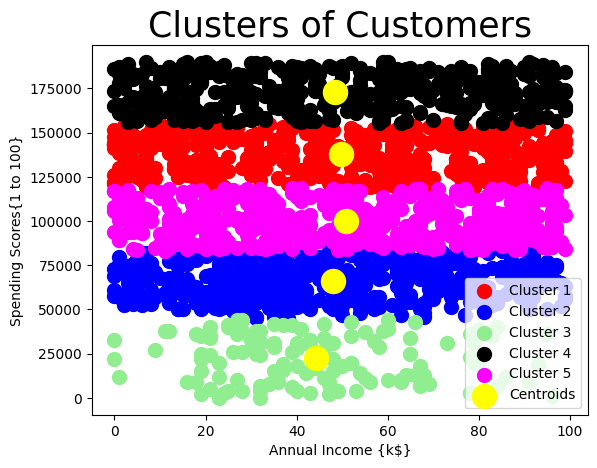

In [17]:
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1],s=100, c = 'red', label ="Cluster 1")
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1],s=100, c = 'blue', label ="Cluster 2")
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1],s=100, c = 'lightgreen', label ="Cluster 3")
plt.scatter(X[y_kmeans == 3,0],X[y_kmeans == 3,1],s=100, c = 'black', label ="Cluster 4")
plt.scatter(X[y_kmeans == 4,0],X[y_kmeans == 4,1],s=100, c = 'magenta', label ="Cluster 5")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 300, c = 'Yellow',label = 'Centroids')
plt.title("Clusters of Customers",size = 25)
plt.xlabel("Annual Income {k$}")
plt.ylabel("Spending Scores{1 to 100}")
plt.legend()
plt.show()

## Internal Evaluation of Cluster
### DB Score (lower is better)

In [18]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X,y_kmeans)

np.float64(0.500694647010564)

## External Evaluation
### Homogenity Score (higher is better)

In [19]:
y_pred = kmeans.predict(X)

In [20]:
from sklearn.metrics.cluster import homogeneity_score
homogeneity_score(y_kmeans,y_pred)

np.float64(1.0)